In [26]:
import geopandas as gpd
import pandas as pd
import osmnx as ox
import numpy as np
import os
import time
from multiprocessing import Pool, cpu_count, Value, Manager, Process
from functools import partial
import json
import osmnx as ox
import networkx as nx
import geopandas as gpd
import pandas as pd
import pandana as pdna
from scipy.stats import zscore
import gc
import csv
import matplotlib.pyplot as plt
%matplotlib inline

In [27]:
# read projected graphml
graphmlProj_path = "belfast_gb_2019_10000m_pedestrian_osm_20190902.graphml"
G = ox.load_graphml("belfast_gb_2019_10000m_pedestrian_osm_20190902.graphml")

# create nodes from G_proj
gdf_edges = ox.graph_to_gdfs(G, nodes=False, edges=True)



    

In [29]:
ox.basic_stats(G, clean_intersects=True, circuity_dist='euclidean')

{'n': 57016,
 'm': 133975,
 'k_avg': 4.69955801880174,
 'intersection_count': 39497,
 'streets_per_node_avg': 2.443401852111688,
 'streets_per_node_counts': {0: 0,
  1: 17519,
  2: 244,
  3: 35822,
  4: 3332,
  5: 85,
  6: 13,
  7: 0,
  8: 0,
  9: 1},
 'streets_per_node_proportion': {0: 0.0,
  1: 0.30726462747299005,
  2: 0.00427950049109022,
  3: 0.6282797811140732,
  4: 0.05843973621439596,
  5: 0.0014908095973060194,
  6: 0.0002280061737056265,
  7: 0.0,
  8: 0.0,
  9: 1.7538936438894344e-05},
 'edge_length_total': 11164707.661999816,
 'edge_length_avg': 83.33426133233675,
 'street_length_total': 5798956.970999992,
 'street_length_avg': 82.98093915544543,
 'street_segments_count': 69883,
 'node_density_km': None,
 'intersection_density_km': None,
 'edge_density_km': None,
 'street_density_km': None,
 'circuity_avg': 87723.52287279542,
 'self_loop_proportion': 0.005299496174659452,
 'clean_intersection_count': 1,
 'clean_intersection_density_km': None}

In [9]:
#Get study area
osm_study_area_file = "data/belfast_gb_2019_1600m_buffer.gpkg"
gdf_study_area = gpd.read_file(osm_study_area_file, layer='urban_study_region')
len(gdf_study_area)

1

In [11]:
official = "data/Belfast_City_Council_Area_Street_Network.shp"
gdf_official = gpd.GeoDataFrame.from_file(official)

In [12]:
gdf_official.head()
len(gdf_official)

19757

In [13]:
if gdf_edges.crs == gdf_official.crs:
    print("same crs")
else:
    gdf_edges = gdf_edges.to_crs(gdf_official.crs)
    gdf_study_area = gdf_study_area.to_crs(gdf_official.crs)
    print(gdf_official.crs, gdf_edges.crs)

/opt/conda/lib/python3.8/site-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))


{'init': 'epsg:29900'} {'init': 'epsg:29900'}


/opt/conda/lib/python3.8/site-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))


In [14]:
#Clip by study boundary
poly = gdf_study_area.geometry.unary_union
osm_clip = gdf_edges[gdf_edges.geometry.intersects(poly)]

official_clip = gdf_official[gdf_official.geometry.intersects(poly)]


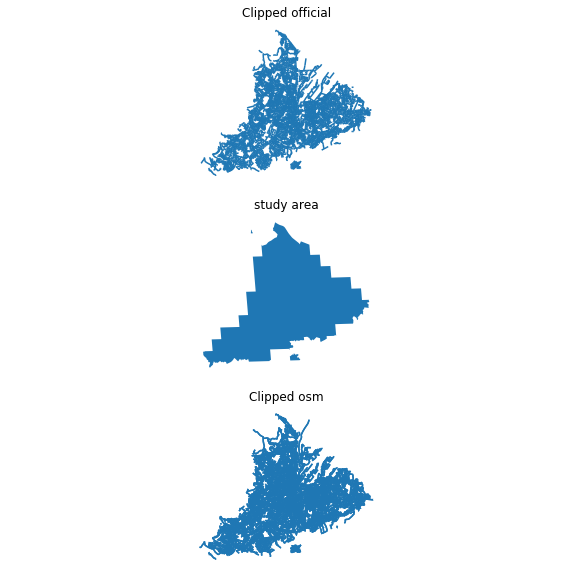

In [15]:
#Plot all layers\n",
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=( 10, 10))
official_clip.plot(ax=ax1)
gdf_study_area.plot(ax=ax2)
osm_clip.plot(ax=ax3)
ax1.set_title("Clipped official")
ax2.set_title("study area")
ax3.set_title("Clipped osm")
ax1.set_axis_off()
ax2.set_axis_off()
ax3.set_axis_off()
plt.axis('equal')

plt.show()

In [25]:
#Comparing data completeness

print("osm segment count : ", len(osm_clip))
print("official segment count: ",len(official_clip))

#Intersection
osm = osm_clip.geometry.unary_union
intersected = official_clip[official_clip.geometry.intersects(osm)]

len(intersected)



osm segment count :  49237
official segment count:  18662


KeyboardInterrupt: 

In [24]:
#calculate total length
total_length_official = 0 
count_official = 0
for line in official_clip.geometry:
    length = line.length
    total_length_official += length
    count_official+=1
print("official total length: ", total_length_official)
print("average length: ", total_length_official/count_official)
total_length_osm = 0

count_osm = 0
total_length_osm = 0
for line in osm_clip.geometry:
    length = line.length
    total_length_osm += length
    count_osm += 1
print("osm total length: ", total_length_osm)
print("average: ", total_length_osm/count_osm)
    

official total length:  1352013.8497378204
average length:  72.44742523512059
osm total length:  3203553.269259891
average:  65.06394112679267


In [ ]:
#Calculating total intersected length
#What % of official intersected with osm 
#What % of osm intersected with official

In [ ]:
#buffering
# Recalculating intersections